In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
data_dir = './DATA/'
df_bcell = pd.read_csv('input_bcell.csv')
df_sars = pd.read_csv('input_sars.csv')
df = pd.concat([df_bcell, df_sars])
df.head()
sns.set(font_scale=2)  # crazy big


In [3]:
df.shape

(14907, 14)

In [4]:
df.drop_duplicates(inplace = True)
df.shape

(14896, 14)

In [40]:
df.isnull().sum();

In [ ]:
# check the number of unique properties
print('The number of unique parent protein is: ',df['parent_protein_id'].nunique())
print('The number of unique parent peptide is: ',df['peptide_seq'].nunique())

The number of unique parent protein is:  761
The number of unique parent peptide is:  14841


In [18]:
# calculate sequence length
df['peptide_len'] = df['end_position'] - df['start_position'] + 1

In [14]:
df['peptide_len'].describe()

count    14907.000000
mean        11.674247
std          5.573895
min          5.000000
25%          9.000000
50%         10.000000
75%         15.000000
max        393.000000
Name: peptide_len, dtype: float64

In [17]:
df_target = df[df['target'] == 1]
df_nontarget = df[df['target'] == 0]

## Peptide features

Before we use models to predict the positive antibody valence, we first explored each feature and tried to find some implications. We split all features into two parts, one containing peptide features, the other containing parent protein features. We visualized the differences between each feature’s distribution, and compared the mean of each feature from target and non-target groups. We identified distinct differences of both peptide and parent protein features between target and non-target groups.
For peptide features, we compared peptide length, chou_fasman (beta return), emini (relative surface accessibility), kolaskar_tongaonkar (antigenicity) and parker (hydrophobicity).

Peptide length is calculated by subtracting peptide start position from end position. The length is integer. The distribution of peptide length is highly right skewed, meaning that most peptides have a short length with a mean of 5, while there are several peptides as long as 393. 

Target and non-target groups have similar distribution of peptide lengths. When we explored the percentage of target records against peptide length, we found that peptides with lengths from 10 to 12 have the highest proportion to display positive antibody valence.
​ 
For other peptide features, we found chou_fasman, kolaskar_tongaonkar and parker are all normally distributed, while emini is right skewed. In terms of differences between target and non-target groups, we found the target group tends to have a higher value for chou_fasman, emini and parker. While for kolaskar_tongaonkar, the non-target group has a higher value. All differences are statistically significant under 0.05 significance level.

Plots of these findings are below

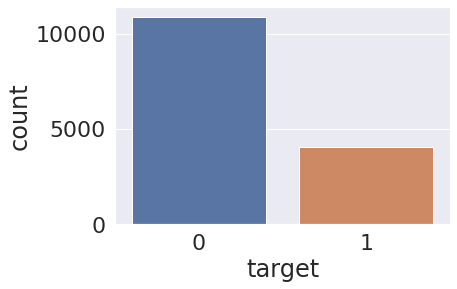

In [10]:
sns.countplot(x = 'target', data = df)

Text(0.5, 1.0, 'percentage of target peptide by peptide length')

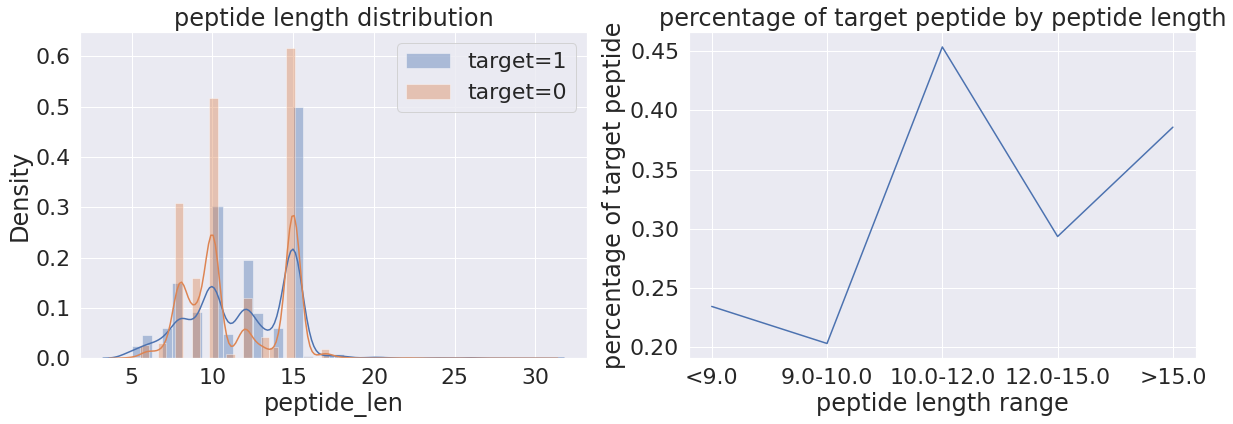

In [19]:
# compare distribution of peptide length
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target[df_target['peptide_len']<=30]['peptide_len'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget[df_nontarget['peptide_len']<=30]['peptide_len'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('peptide length distribution')
peptide_len = df[['peptide_len','target']]
peptide_len['length range'] = pd.qcut(peptide_len['peptide_len'],5,labels=['<9.0','9.0-10.0','10.0-12.0','12.0-15.0','>15.0'])
ax[1].plot(peptide_len.groupby('length range')['target'].mean())
ax[1].set_xlabel('peptide length range')
ax[1].set_ylabel('percentage of target peptide')
ax[1].set_title('percentage of target peptide by peptide length')

In [ ]:
df['chou_fasman'].describe()

count    14896.000000
mean         0.994906
std          0.123667
min          0.534000
25%          0.913000
50%          0.991000
75%          1.073000
max          1.546000
Name: chou_fasman, dtype: float64

Text(0.5, 1.0, 'average chou fasman by target')

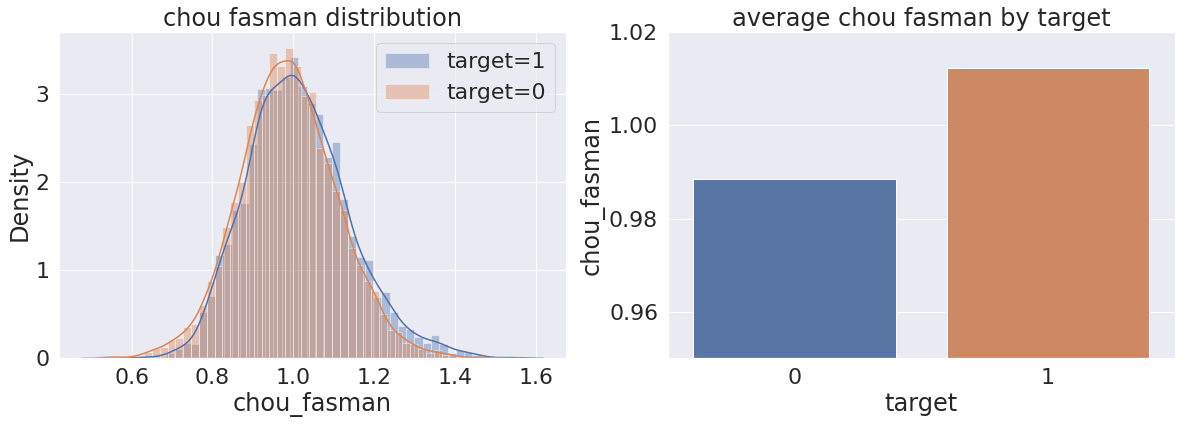

In [21]:
# compare chou fasman
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['chou_fasman'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['chou_fasman'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('chou fasman distribution')
pep_bychou = df.groupby('target')['chou_fasman'].mean().reset_index()
sns.barplot(x = pep_bychou['target'],y=pep_bychou['chou_fasman'])
ax[1].set_ylim(0.95,1.02)
ax[1].set_title('average chou fasman by target')

In [22]:
df['emini'].describe()

count    14907.000000
mean         1.082811
std          1.826098
min          0.000000
25%          0.244000
50%          0.551000
75%          1.208500
max         40.605000
Name: emini, dtype: float64

Text(0.5, 1.0, 'average emini by target')

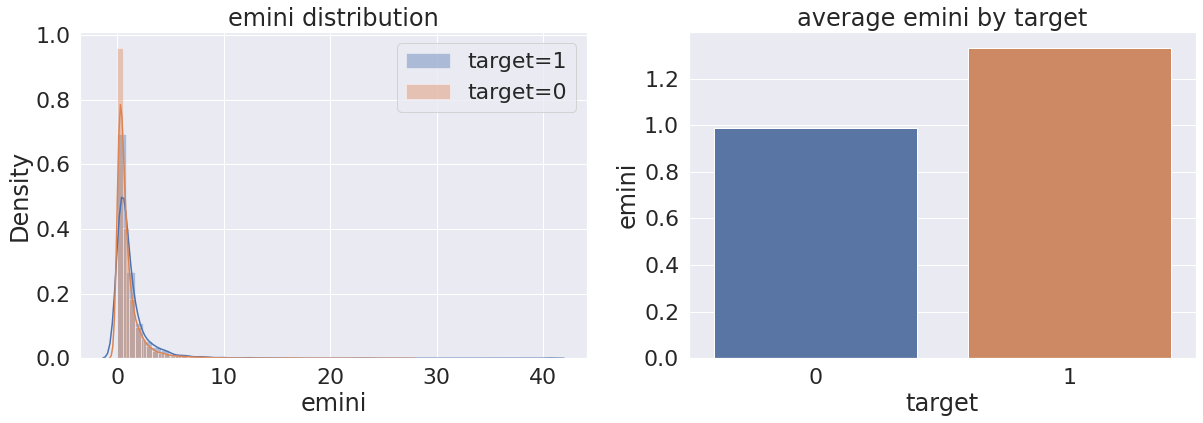

In [23]:
# compare emini
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['emini'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['emini'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('emini distribution')
pep_byemini = df.groupby('target')['emini'].mean().reset_index()
sns.barplot(x = pep_byemini['target'],y=pep_byemini['emini'])
ax[1].set_title('average emini by target')

In [24]:
df['kolaskar_tongaonkar'].describe()

count    14907.000000
mean         1.021808
std          0.053430
min          0.838000
25%          0.987000
50%          1.021000
75%          1.055000
max          1.255000
Name: kolaskar_tongaonkar, dtype: float64

(1.0, 1.03)

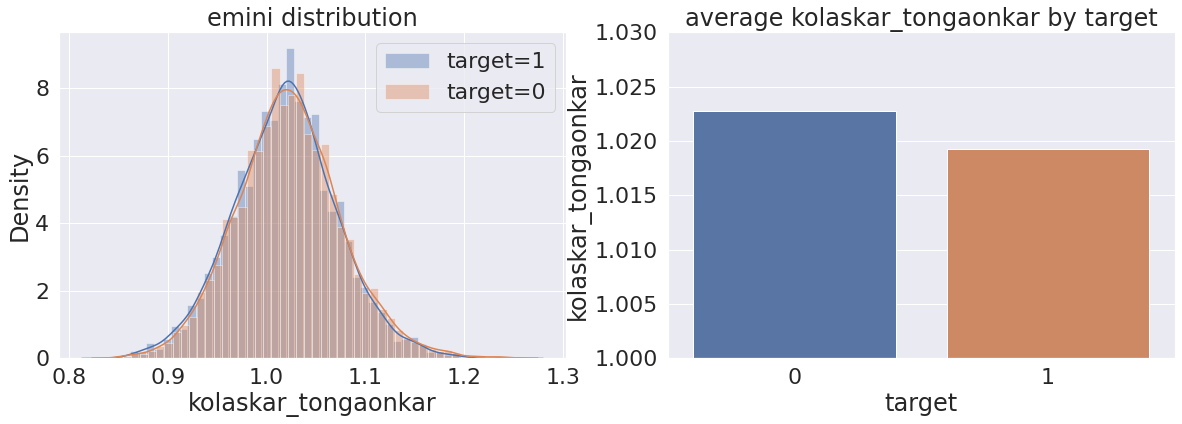

In [25]:
# compare kolaskar_tongaonkar
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['kolaskar_tongaonkar'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['kolaskar_tongaonkar'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('emini distribution')
pep_bykol = df.groupby('target')['kolaskar_tongaonkar'].mean().reset_index()
sns.barplot(x = pep_bykol['target'],y=pep_bykol['kolaskar_tongaonkar'])
ax[1].set_title('average kolaskar_tongaonkar by target')
ax[1].set_ylim(1.0,1.03)

In [26]:
df['parker'].describe()

count    14907.000000
mean         1.750098
std          1.954424
min         -9.029000
25%          0.600000
50%          1.775000
75%          2.960000
max          9.120000
Name: parker, dtype: float64

(1.6, 1.9)

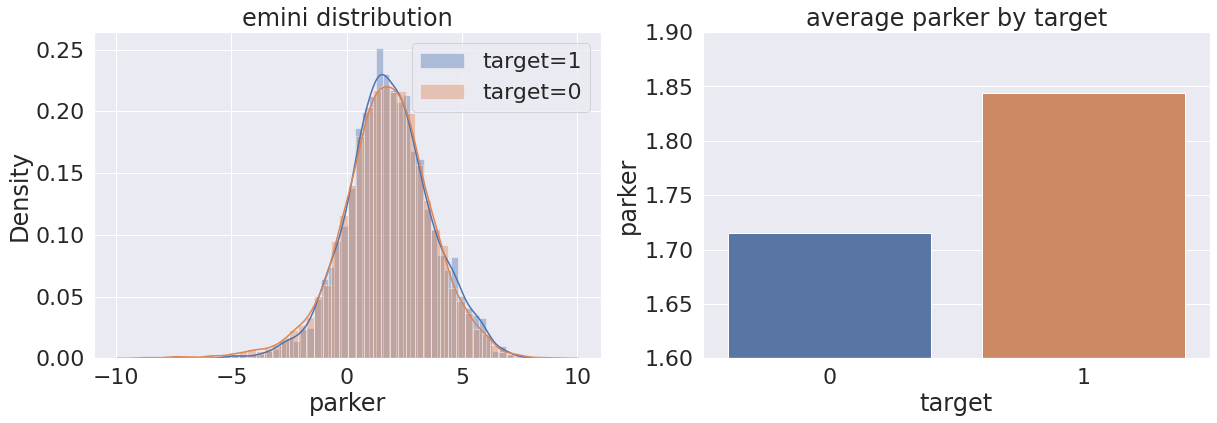

In [27]:
# compare parker
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['parker'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['parker'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('emini distribution')
pep_byparker = df.groupby('target')['parker'].mean().reset_index()
sns.barplot(x = pep_byparker['target'],y=pep_byparker['parker'])
ax[1].set_title('average parker by target')
ax[1].set_ylim(1.6,1.9)

## Parent Protein Features

For parent protein features, we compared isoelectric_point, aromaticity, hydrophobicity and stability. We found that the target group shows a higher value for aromaticity, hydrophobicity and stability, while the non-target group displays a higher value for isoelectric_point. All differences are statistically significant under 0.05 significance level.

In [28]:
df['isoelectric_point'].describe()

count    14907.000000
mean         7.015227
std          1.875713
min          3.686096
25%          5.569763
50%          6.447815
75%          8.676575
max         12.232727
Name: isoelectric_point, dtype: float64

(5.0, 8.0)

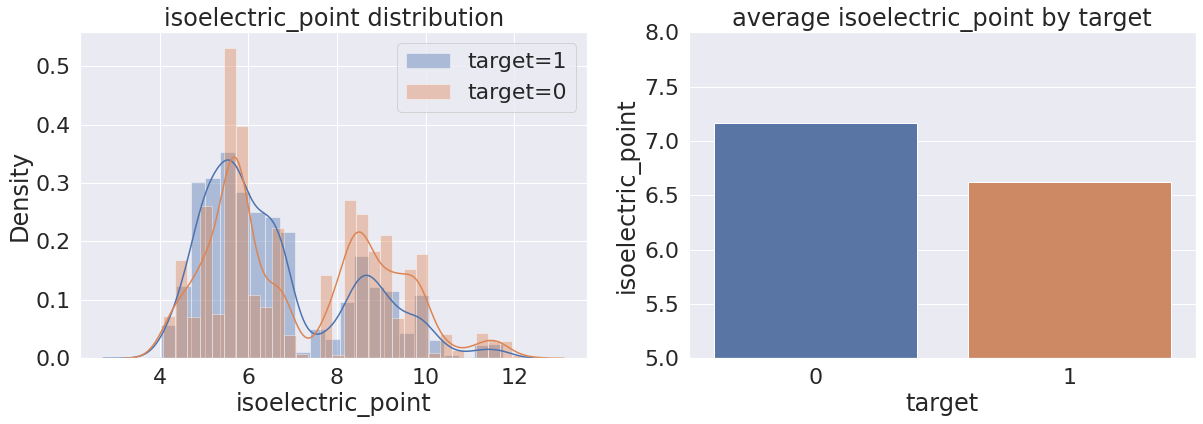

In [29]:
# compare isoelectric_point
sns.set(font_scale=2)  # crazy big

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['isoelectric_point'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['isoelectric_point'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('isoelectric_point distribution')
pep_byiso = df.groupby('target')['isoelectric_point'].mean().reset_index()
sns.barplot(x = pep_byiso['target'],y=pep_byiso['isoelectric_point'])
ax[1].set_title('average isoelectric_point by target')
ax[1].set_ylim(5,8)

In [30]:
df['aromaticity'].describe()

count    14907.000000
mean         0.077143
std          0.026388
min          0.000000
25%          0.062500
50%          0.075949
75%          0.093458
max          0.182254
Name: aromaticity, dtype: float64

(0.07, 0.08)

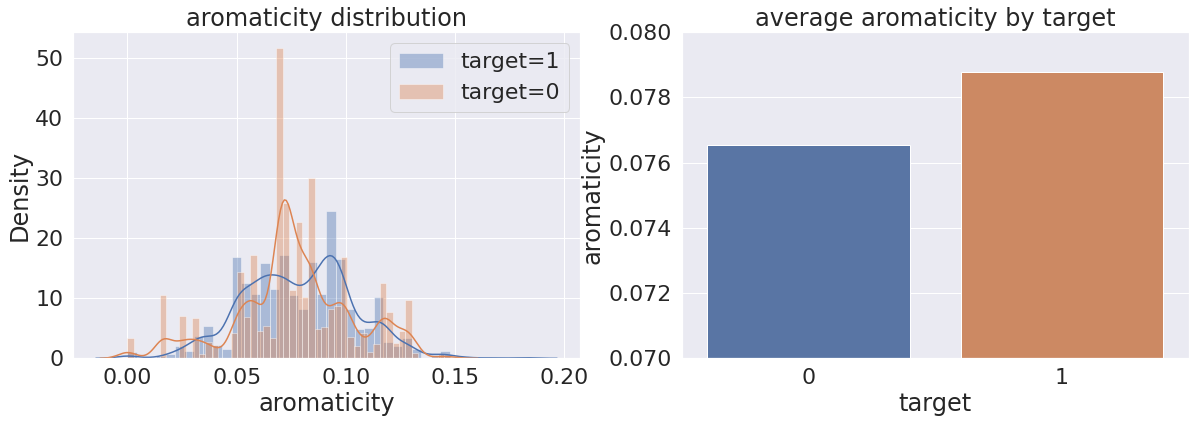

In [31]:
# compare aromaticity
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['aromaticity'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['aromaticity'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('aromaticity distribution')
pep_byar = df.groupby('target')['aromaticity'].mean().reset_index()
sns.barplot(x = pep_byar['target'],y=pep_byar['aromaticity'])
ax[1].set_title('average aromaticity by target')
ax[1].set_ylim(0.07,0.08)

In [32]:
df['hydrophobicity'].describe()

count    14907.000000
mean        -0.394063
std          0.392808
min         -1.971171
25%         -0.600131
50%         -0.318259
75%         -0.189591
max          1.267089
Name: hydrophobicity, dtype: float64

Text(0.5, 1.0, 'average hydrophobicity by target')

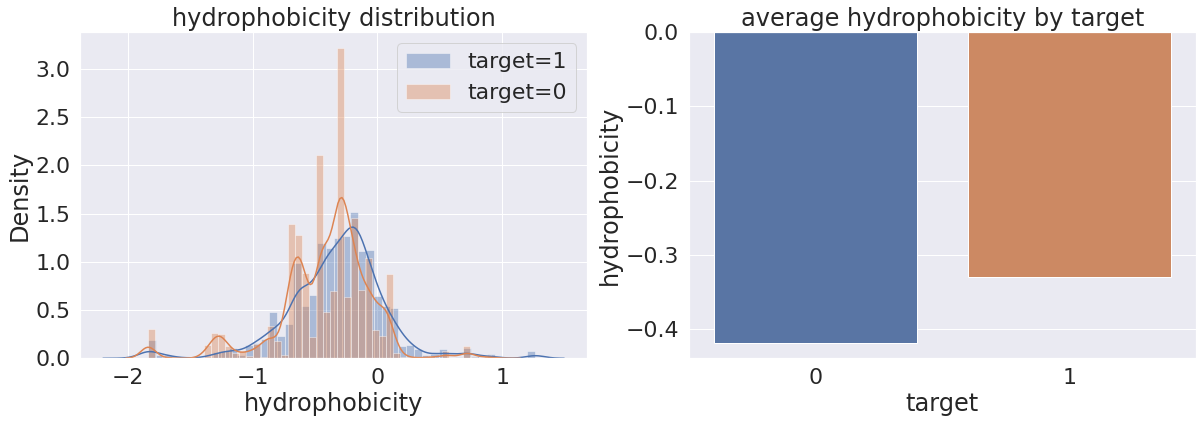

In [33]:
# compare hydrophobicity
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['hydrophobicity'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['hydrophobicity'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('hydrophobicity distribution')
pep_byhy = df.groupby('target')['hydrophobicity'].mean().reset_index()
sns.barplot(x = pep_byhy['target'],y=pep_byhy['hydrophobicity'])
ax[1].set_title('average hydrophobicity by target')

In [ ]:
df['stability'].describe()

count    14896.000000
mean        43.343509
std         16.505895
min          5.448936
25%         31.725753
50%         41.984246
75%         49.101172
max        137.046667
Name: stability, dtype: float64

(40.0, 45.0)

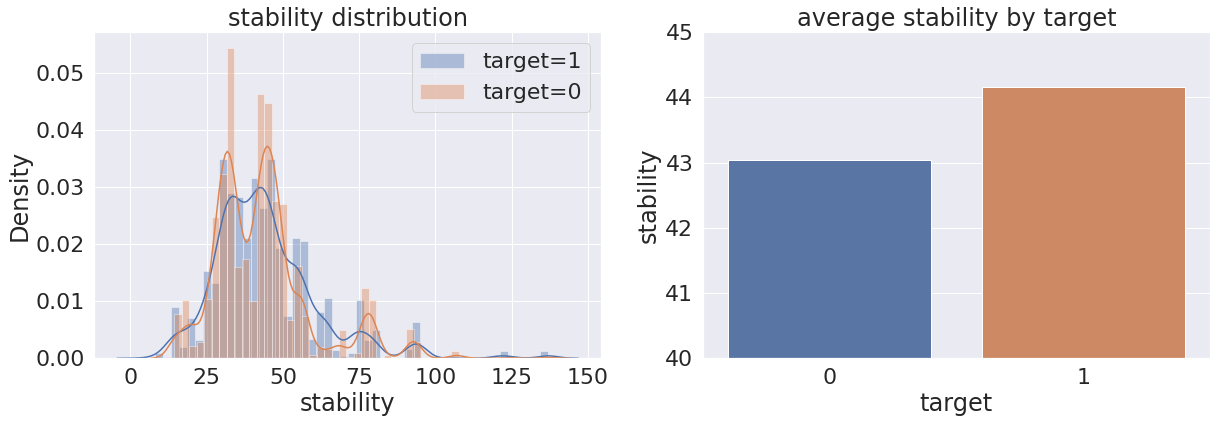

In [34]:
# compare stability
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['stability'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['stability'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('stability distribution')
pep_bystab = df.groupby('target')['stability'].mean().reset_index()
sns.barplot(x = pep_bystab['target'],y=pep_bystab['stability'])
ax[1].set_title('average stability by target')
ax[1].set_ylim(40,45)

## Correlation

Since linear correlated variables would break the assumptions of some linear models, we checked the correlation of our variables by creating a correlation matrix. The matrix shows that our variables are not linearly correlated. Therefore we could apply linear models to estimate.


In [36]:
corr_df = df[['peptide_len','chou_fasman','emini','kolaskar_tongaonkar','parker','isoelectric_point','aromaticity','hydrophobicity','stability','target']].corr()

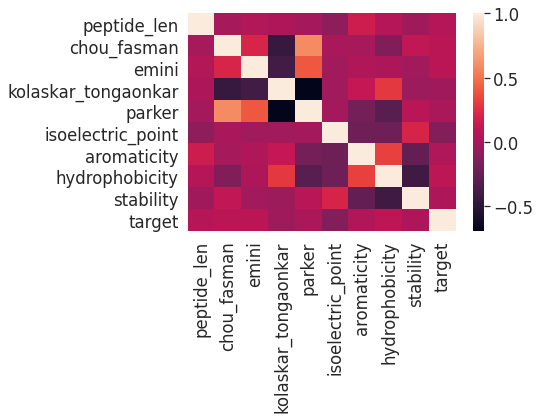

In [39]:
sns.set(font_scale=1.5)  # crazy big

sns.heatmap(corr_df)
